<a href="https://colab.research.google.com/github/DaveWinc/Wincexercise/blob/main/Final_project_Dave_Koot__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#What is the largest predictor of a large CO2 output per capita of a country?**


considering things like:

*   GDP per capita
*   Hoeveelheid groente p.p.
*   % Herbruikbare energie
*   Aantal auto's p.p.
*   Aantal km reizen naar werk


**Sorts of data needed**

*  CO2 output per country
*  factors per country
*  inhabitants per country

**Beschikbare dataframes**

*  df_co2_capita
*  df_gdp
*  df_vehicle
*  df_diet
*  df_travel
*  df_energy
*  df_code

**Pearson r effect size**

* 0.00 < 0.10 = Negligible

* 0.10 < 0.20 = Weak

* 0.20 < 0.40 = Moderate

* 0.40 < 0.60 = Relatively strong

* 0.60 < 0.80 = Strong

* 0.80 <= 1.00 = Very strong


In [ ]:
#Connecting with google drive
from google.colab import drive
drive.mount('/content/drive')

In [13]:
#Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

######################

Landcode filter
######################

In [14]:
#Creating landcode filter

#Reading html for landcodes
tables = pd.read_html('https://www.iban.com/country-codes')

df = tables[0]

df_code = df.drop(['Alpha-2 code', 'Numeric'], axis=1)
df_code.rename(columns={'Alpha-3 code':'Code'}, inplace=True)

#creating list with landcodes
code_unique = df_code['Code'].unique()

#######################################

Jaarlijkse CO2 uitstoot p.p.  per land.
#######################################

In [22]:
#Creating CO2 per capita dataframe

#reading csv
df_co2_capita = pd.read_csv('/content/drive/MyDrive/Final Winc project/files for largest predictor/Co2-emissions-per-capita.csv')

#renaming CO2 per capita column
df_co2_capita = df_co2_capita.rename(columns={'Annual CO₂ emissions (per capita)': 'CO₂(tonnes)/capita'})

display(df_co2_capita)

#filtering for landodes
co2_code = df_co2_capita[df_co2_capita['Code'].isin(code_unique)]
display(co2_code)

,Entity,Code,Year,CO₂(tonnes)/capita
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.011266
2,Afghanistan,AFG,1951,0.012098
3,Afghanistan,AFG,1952,0.011946
4,Afghanistan,AFG,1953,0.013685
...,...,...,...,...
26595,Zimbabwe,ZWE,2018,0.711830
26596,Zimbabwe,ZWE,2019,0.636645
26597,Zimbabwe,ZWE,2020,0.500945
26598,Zimbabwe,ZWE,2021,0.524972


,Entity,Code,Year,CO₂(tonnes)/capita
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.011266
2,Afghanistan,AFG,1951,0.012098
3,Afghanistan,AFG,1952,0.011946
4,Afghanistan,AFG,1953,0.013685
...,...,...,...,...
26595,Zimbabwe,ZWE,2018,0.711830
26596,Zimbabwe,ZWE,2019,0.636645
26597,Zimbabwe,ZWE,2020,0.500945
26598,Zimbabwe,ZWE,2021,0.524972


########################

GDP per persoon  

Pearson = 0.61

p = 0.0
########################





In [16]:
#Creating GDP dataframe and calculating pearson

#reading csv
df_gdp = pd.read_csv('/content/drive/MyDrive/Final Winc project/files for largest predictor/gdp-per-capita.csv')

#dropping column
df_gdp.drop('417485-annotations', axis=1, inplace=True)

#display(df_gdp)


#Combining CO2 and GDP on Code
df_gdp_cb = co2_code.merge(df_gdp, how = 'inner')

#filtering for Entities with a valid landcode
gdp_filtered = df_gdp_cb[df_gdp_cb['Code'].isin(code_unique)]
#display(gdp_filtered)

#missing values
gdp_missing = df_gdp_cb.isnull().sum()
#print(gdp_missing)

#calculating pearsonr
gdp_r, gdp_p = pearsonr(gdp_filtered['GDP per capita'], gdp_filtered['CO₂(tonnes)/capita'])

print(gdp_r)

0.6073699715285951


############################

Voertuigen per 1000 inwoners

Pearson = 0.55

p = 2.71 *10^-14

No info on San Marino -> excluded
############################

In [17]:
#Creating vehicle dataframe and calculation pearson

#read csv
df_vehicle = pd.read_csv('/content/drive/MyDrive/Final Winc project/files for largest predictor/registered-vehicles-per-1000-people.csv')

#renaming column
df_vehicle.rename(columns={'Registered vehicles per 1,000 people': 'Vehicles/1000 people'}, inplace=True)

vehicle_missing = df_vehicle.isnull().sum()
#print(vehicle_missing)
#display(df_vehicle)

#merging CO2 and vehicles
df_vehicle_cb = df_vehicle.merge(co2_code, how = 'inner')
#display(df_vehicle_cb)

ve_list = df_vehicle_cb.loc[:, 'Entity'].tolist()
#print(ve_list)

uitzondering = df_vehicle[~df_vehicle['Entity'].isin(ve_list)]
#print(uitzondering)

#calculating pearsonr
vehicle_r, vehicle_p = pearsonr(df_vehicle_cb['Vehicles/1000 people'], df_vehicle_cb['CO₂(tonnes)/capita'])

print(vehicle_r)

0.5547428467622328


##############################

Groente consumptie per inwoner

Pearson = 0.31

p = 1,60 * 10^-217
##############################

In [23]:
#Creating diet dataframe and calculating pearson

#read csv
df_diet = pd.read_csv('/content/drive/MyDrive/Final Winc project/files for largest predictor/vegetable-consumption-per-capita.csv')

#renaming column
df_diet.rename(columns={'Vegetables | 00002918 || Food available for consumption | 0645pc || kilograms per year per capita':'Vegetables (kg) per capita'}, inplace=True)

#filteren voor alleen landcodes
uitzondering = df_diet[df_diet['Code'].isin(code_unique)]

#merging CO2 and diet
df_diet_cb = uitzondering.merge(df_co2_capita, how = 'inner')
display(df_diet_cb)
#calculating pearson
diet_r, diet_p = pearsonr(df_diet_cb['Vegetables (kg) per capita'], df_diet_cb['CO₂(tonnes)/capita'])

print(diet_r)

,Entity,Code,Year,Vegetables (kg) per capita,CO₂(tonnes)/capita
0,Afghanistan,AFG,1961,37.435070,0.055835
1,Afghanistan,AFG,1962,38.192513,0.076774
2,Afghanistan,AFG,1963,39.644800,0.077176
3,Afghanistan,AFG,1964,40.992203,0.089632
4,Afghanistan,AFG,1965,41.683067,0.105269
...,...,...,...,...,...
9619,Zimbabwe,ZWE,2017,14.879999,0.630165
9620,Zimbabwe,ZWE,2018,14.569989,0.711830
9621,Zimbabwe,ZWE,2019,13.500004,0.636645
9622,Zimbabwe,ZWE,2020,13.580006,0.500945


0.3128482658400404


######################

Reisafstand naar werk

Pearson = -0.03

p = 0.77
######################

In [19]:
#Creating travel dataframe and calculating pearson

#read csv
df_travel = pd.read_csv('/content/drive/MyDrive/Final Winc project/files for largest predictor/Travel_distance_work.csv')

#drop column
#df_travel.drop('Date', axis=1, inplace=True)

#rename column
df_travel.rename(columns={'Amount': 'Travel distance (km)', 'Date':'Year'}, inplace=True)
#display(df_travel)

country_merge = df_travel.merge(df_code, how = 'left')
display(country_merge)


#Travel distance table missed country codes. Tryed to merge with country codes table but not all country names were the same. Had to manually adjust a couple of them.
rows_to_update = [4, 7, 16, 28, 36, 38, 45, 48, 50, 51, 60, 67, 70]
new_country_codes = ['TWN', 'BOL', 'USA', 'RUS', 'CZE', 'PHL', 'SYR', 'GBR', 'NLD', 'KOR', 'VEN', 'IRN', 'ARE']

country_merge.loc[rows_to_update, 'Code'] = new_country_codes

#finally merging CO2 and travel ditance
df_travel_cb = country_merge.merge(df_co2_capita, how = 'inner')
df_travel_cb.drop('Entity', axis=1, inplace=True)

#changing distance km from string to float
df_travel_cb['Travel distance (km)'] = df_travel_cb['Travel distance (km)'].str.replace(' km', '').astype(float)
#display(df_travel_cb)

#calculating Pearson
travel_r, travel_p = pearsonr(df_travel_cb['Travel distance (km)'], df_travel_cb['CO₂(tonnes)/capita'])

print(travel_r)

,Country,Travel distance (km),Year,Code
0,Egypt,39.82 km,2014,EGY
1,Singapore,24 km,2013,SGP
2,Denmark,22.67 km,2014,DNK
3,Japan,18.88 km,2014,JPN
4,Taiwan,17.5 km,2014,NaN
...,...,...,...,...
72,Lebanon,1 km,2013,LBN
73,Estonia,1 km,2013,EST
74,Uruguay,1 km,2013,URY
75,Kuwait,1 km,2013,KWT


-0.03291789635680763


###############################

Percentage herbruikbare energie

Pearson = -0.20

p = 2.59 * 10^-31
###############################

In [20]:
#Creating renewable energy dataframe and calculating pearson

#read csv
df_energy = pd.read_csv('/content/drive/MyDrive/Final Winc project/files for largest predictor/renewable-share-energy.csv')

#rename column
df_energy.rename(columns={'Renewables (% equivalent primary energy)':'% Renewables'}, inplace=True)
#display(df_energy)

#filtering df_energy for all row containing a valid landcode
df_energy_code = df_energy[df_energy['Code'].isin(code_unique)]
#display(df_energy_code)

#merging CO2 with energy
df_energy_cb = df_co2_capita.merge(df_energy_code)
#display(df_energy_cb)

#calculating pearsonr
energy_r, energy_p = pearsonr(df_energy_cb['% Renewables'], df_energy_cb['CO₂(tonnes)/capita'])

print(energy_r)

-0.19823500559095303


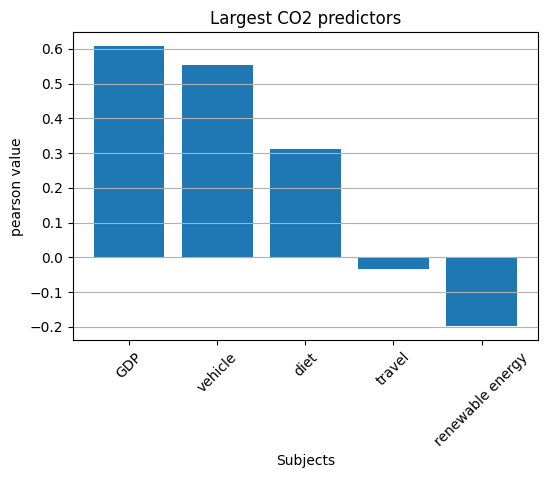

In [21]:
#Creating visuals - bar histogram
p_data = [gdp_r, vehicle_r, diet_r, travel_r, energy_r]
subjects_data = ['GDP', 'vehicle', 'diet', 'travel', 'renewable energy']

plt.figure(figsize=[6, 4])

plt.bar(subjects_data, p_data)
plt.xlabel('Subjects')
plt.ylabel('pearson value')
plt.grid(axis='y')
plt.title('Largest CO2 predictors')
plt.tick_params(axis='x', rotation=45)
plt.show()